In [1]:
!pip show pandas
!pip show numpy
!pip show plotnine
!pip show folium


Name: pandas
Version: 0.23.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, vega-datasets, statsmodels, stable-baselines, pymc3, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, magenta, gspread-dataframe, fix-yahoo-finance, featuretools, fbprophet, cufflinks, altair
Name: numpy
Version: 1.14.6
Summary: NumPy: array processing for numbers, strings, records, and objects.
Home-page: http://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, umap-learn, thinc, Theano, tflearn, tensorflow, tensorflow-probability, tensorflow-hub, tensorboard, tensor2tensor, tables, stable-baselines, spacy, scs, scipy, sci

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [0]:
import pandas as pd
import numpy as np
from plotnine import *
import re
import folium

In [19]:
from google.colab import files
uploaded = files.upload()
import io
data = io.BytesIO(uploaded['park.csv'])   

park = pd.read_csv(data, encoding='euc-kr')

park.head()

Saving park.csv to park (4).csv


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,광주광역시 북구 문흥동 1009-1,35.184917,126.916686,87710.3,NaN,NaN,NaN,NaN,NaN,1990-12-31,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,광주광역시 북구 두암동 969-4,35.165104,126.937650,13383.5,NaN,NaN,NaN,NaN,NaN,1990-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,광주광역시 북구 오룡동 1113,35.220546,126.858765,170920.6,NaN,NaN,NaN,NaN,NaN,1991-12-12,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,광주광역시 북구 일곡동 850-1,35.207975,126.895445,34840.3,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,광주광역시 북구 일곡동 820-2,35.206500,126.898395,10315.0,NaN,NaN,NaN,NaN,NaN,1993-12-06,광주광역시 북구청,062-410-6438,2018-04-17,3620000,광주광역시 북구,NaN


In [20]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

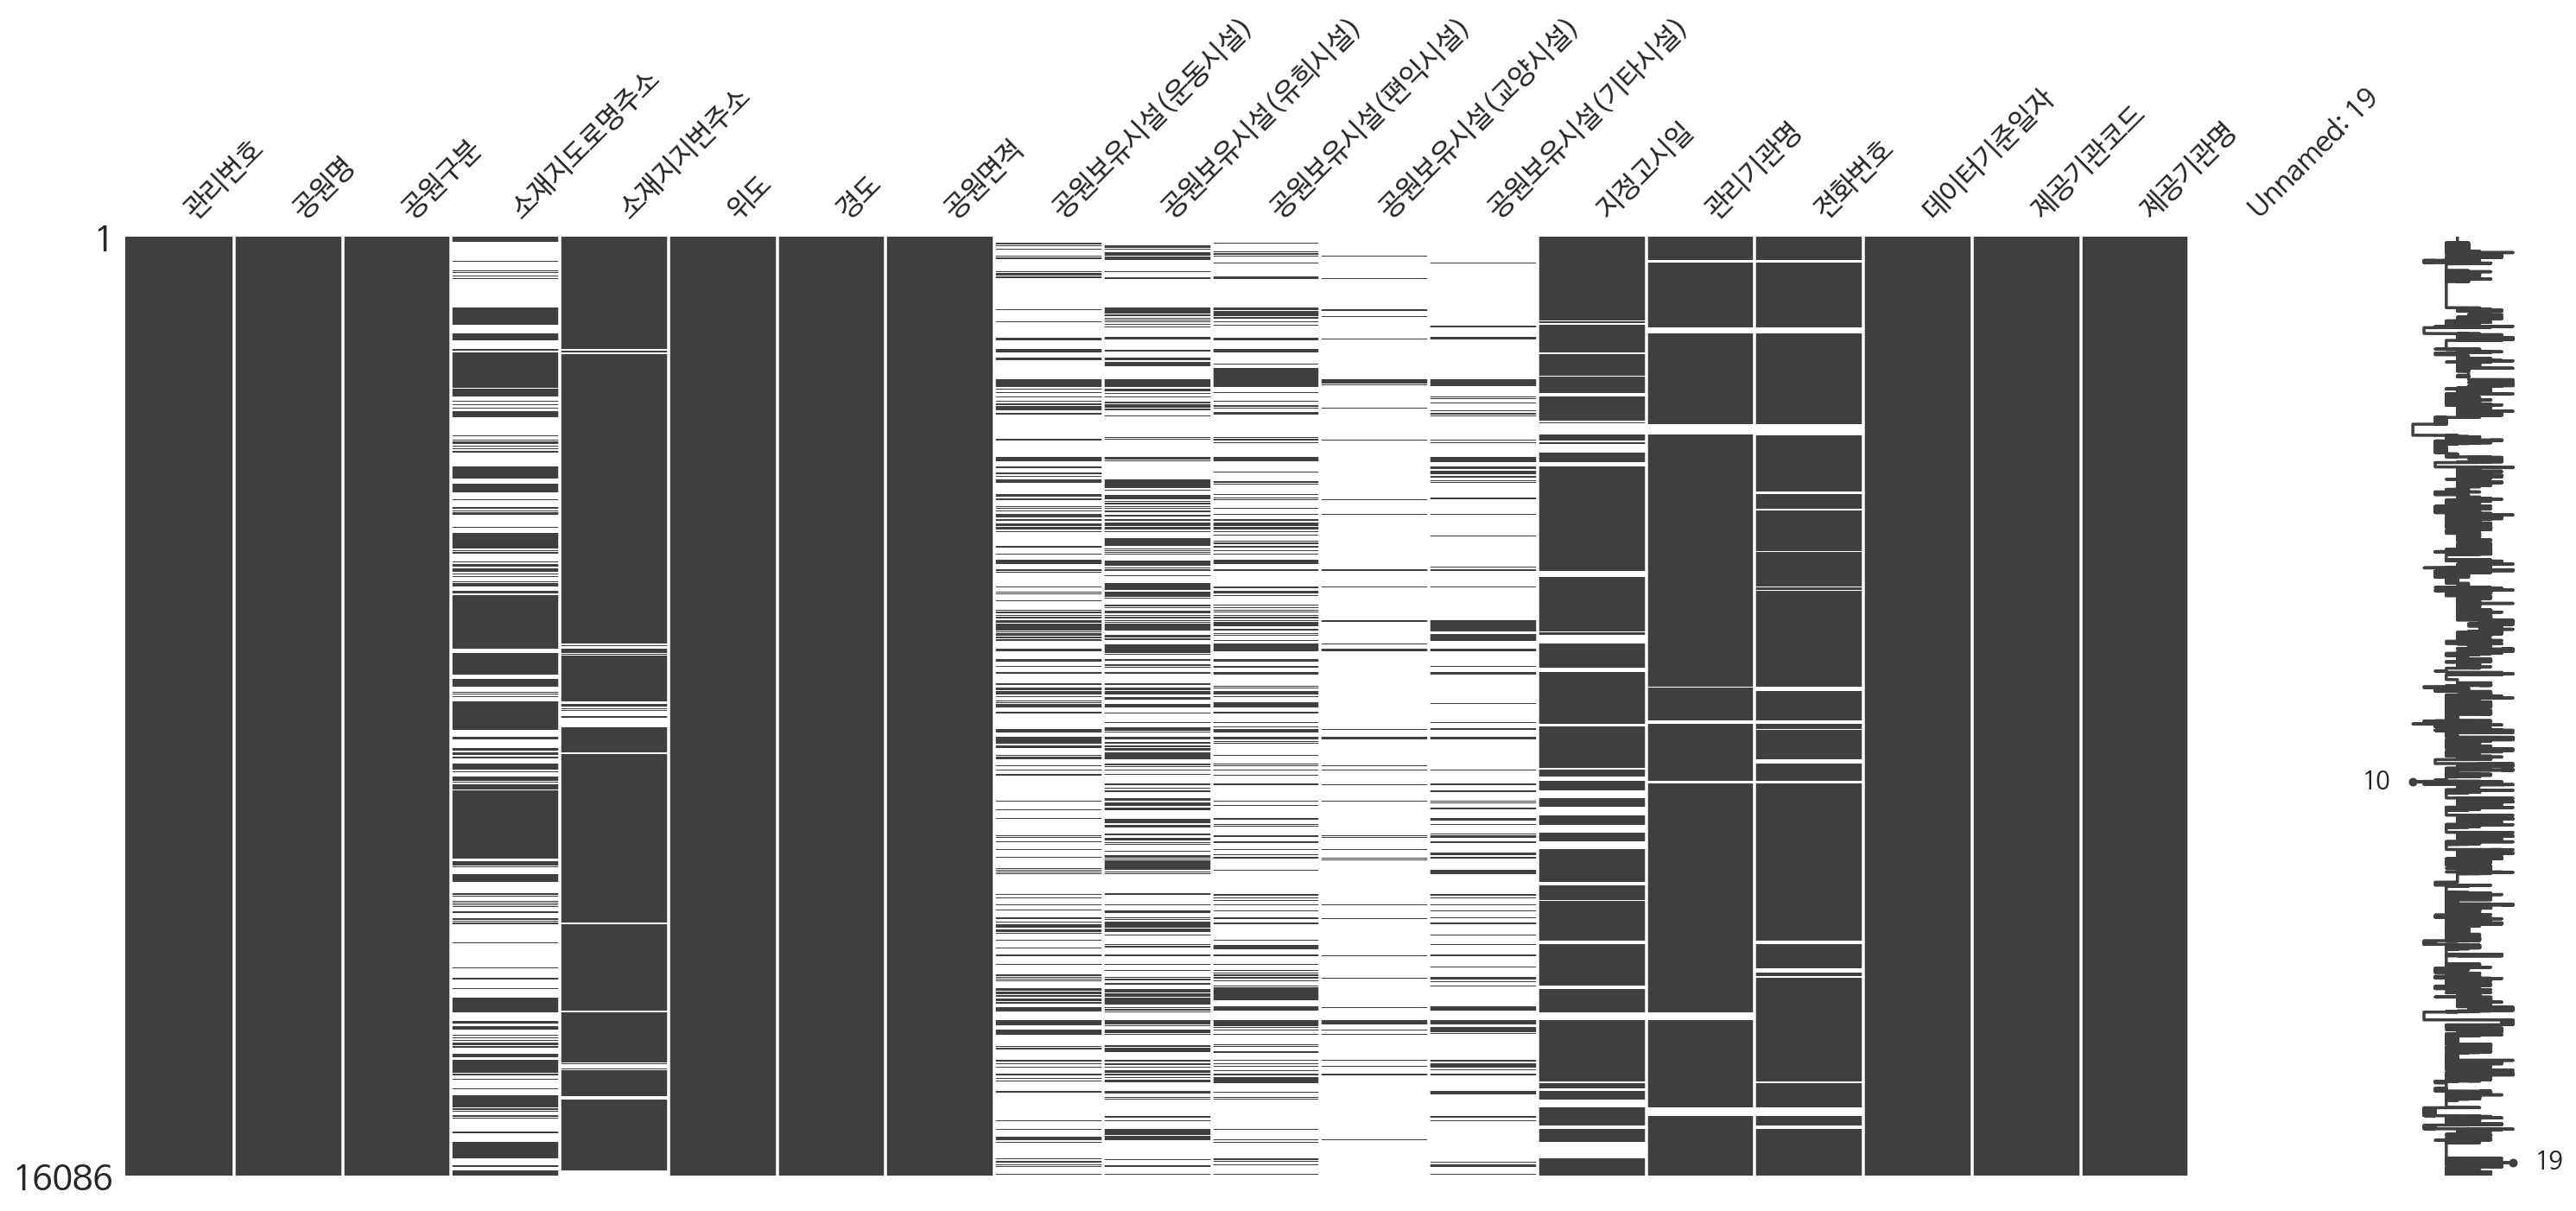

In [24]:
import missingno as msno

msno.matrix(park)

In [29]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 19'  ], inplace=True)

KeyError: ignored

In [30]:
park.shape

(16086, 12)

In [27]:
park.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소    7775
소재지지번주소      883
위도             0
경도             0
공원면적           0
전화번호        1130
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64

In [0]:
park.drop(columns=['소재지도로명주소', '소재지지번주소', '전화번호'  ], inplace=True)

In [32]:
park.isnull().sum()

관리번호       0
공원명        0
공원구분       0
위도         0
경도         0
공원면적       0
데이터기준일자    0
제공기관코드     0
제공기관명      0
dtype: int64

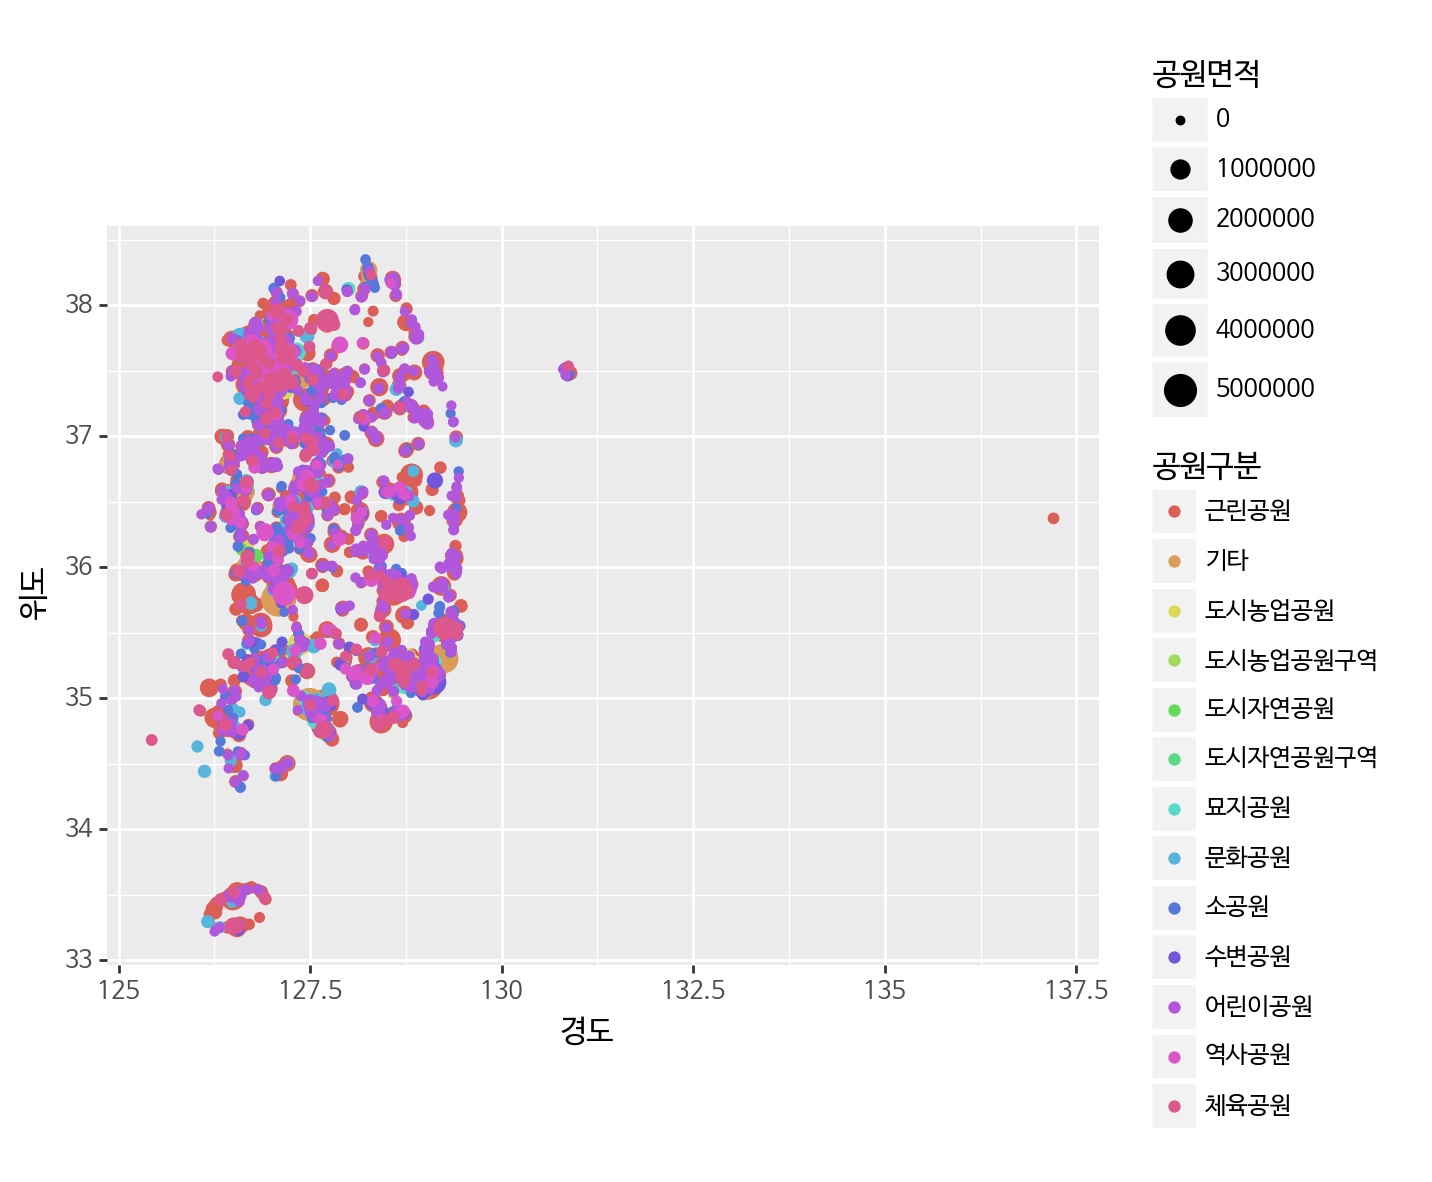

<ggplot: (-9223363266029079103)>

In [37]:
(ggplot(park)
+ aes(x='경도', y='위도', color='공원구분', size='공원면적')
+ geom_point()
+ theme(text=element_text(family='NanumBarunGothic')))